In [1]:
from pyforest import *
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
lazy_imports()

['import torch',
 'import seaborn as sns',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.cluster import KMeans',
 'import skimage',
 'from sklearn.preprocessing import LabelEncoder',
 'import xgboost as xgb',
 'from sklearn.decomposition import PCA',
 'import sklearn',
 'from scipy import signal as sg',
 'import pickle',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn import svm',
 'from sklearn.linear_model import LinearRegression',
 'import tqdm',
 'import textblob',
 'import fastai',
 'from sklearn.model_selection import cross_val_score',
 'import pydot',
 'from scipy import stats',
 'import altair as alt',
 'import statsmodels.api as sm',
 'import matplotlib as mpl',
 'import cv2',
 'from sklearn.linear_model import ElasticNetCV',
 'import lightgbm as lgb',
 'import bokeh',
 'from sklearn.linear_model import ElasticNet',
 'import keras',
 'from sklearn.feature_extraction.text i

In [3]:
data = pd.read_csv('concrete_data.csv')
data.head()

<IPython.core.display.Javascript object>

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.rename(columns={'fine_aggregate ': 'fine_aggregate', 'concrete_compressive_strength': 'strength'}, inplace=True)

In [5]:
data.shape

(1030, 9)

In [6]:
data.dtypes

cement                float64
blast_furnace_slag    float64
fly_ash               float64
water                 float64
superplasticizer      float64
coarse_aggregate      float64
fine_aggregate        float64
age                     int64
strength              float64
dtype: object

In [7]:
data.isna().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### EDA

#### Cement

In [9]:
q1 = data.cement.quantile(q=0.25)
q3 = data.cement.quantile(q=0.75)
iqr = stats.iqr(data.cement)
print('1st Quartile:', q1)
print('3rd Quartile:', q3)
print('Inter-Quartile Range:', iqr)

<IPython.core.display.Javascript object>

1st Quartile: 192.375
3rd Quartile: 350.0
Inter-Quartile Range: 157.625


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

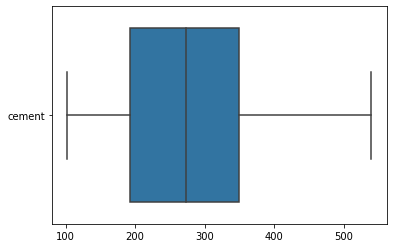

In [10]:
sns.boxplot(data.cement, orient='h')
plt.yticks([0], ['cement'])
plt.show()

#### water

In [11]:
q1 = data.water.quantile(q=0.25)
q3 = data.water.quantile(q=0.75)
iqr = stats.iqr(data.water)
print('1st Quartile:', q1)
print('3rd Quartile:', q3)
print('Inter-Quartile Range:', iqr)

<IPython.core.display.Javascript object>

1st Quartile: 164.9
3rd Quartile: 192.0
Inter-Quartile Range: 27.099999999999994


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

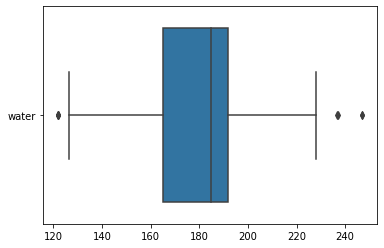

In [12]:
sns.boxplot(data.water, orient='h')
plt.yticks([0], ['water'])
plt.show()

In [13]:
l_limit = q1-1.5*iqr
u_limit = q3+1.5*iqr
print(f'Range of values in water: [{l_limit}, {u_limit}]')

Range of values in water: [124.25000000000001, 232.64999999999998]


In [14]:
print('Outliers below Lower Limit:', data[data.water<l_limit]['water'].count())
print('Ouliers above Upper Limit:', data[data.water>u_limit]['water'].count())

Outliers below Lower Limit: 5
Ouliers above Upper Limit: 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

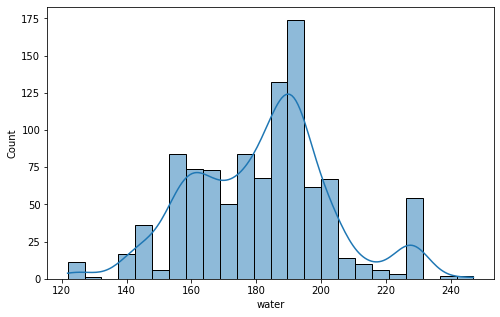

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data.water, kde=True)
plt.show()

#### blast_furnace_slag

In [16]:
q1 = data.blast_furnace_slag.quantile(q=0.25)
q3 = data.blast_furnace_slag.quantile(q=0.75)
iqr = stats.iqr(data.blast_furnace_slag)
print('1st Quartile:', q1)
print('3rd Quartile:', q3)
print('Inter-Quartile Range:', iqr)

<IPython.core.display.Javascript object>

1st Quartile: 0.0
3rd Quartile: 142.95
Inter-Quartile Range: 142.95


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

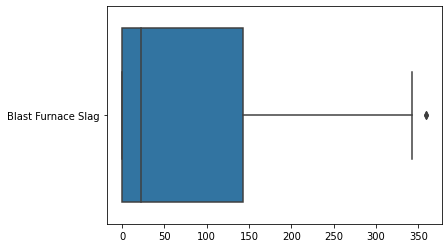

In [17]:
sns.boxplot(data.blast_furnace_slag, orient='h')
plt.yticks([0], ['Blast Furnace Slag'])
plt.show()

In [18]:
l_limit = q1-1.5*iqr
u_limit = q3+1.5*iqr
print(f'Range of values in water: [{l_limit}, {u_limit}]')

Range of values in water: [-214.42499999999998, 357.375]


In [19]:
print('Outliers below Lower Limit:', data[data.blast_furnace_slag<l_limit]['blast_furnace_slag'].count())
print('Ouliers above Upper Limit:', data[data.blast_furnace_slag>u_limit]['blast_furnace_slag'].count())

Outliers below Lower Limit: 0
Ouliers above Upper Limit: 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

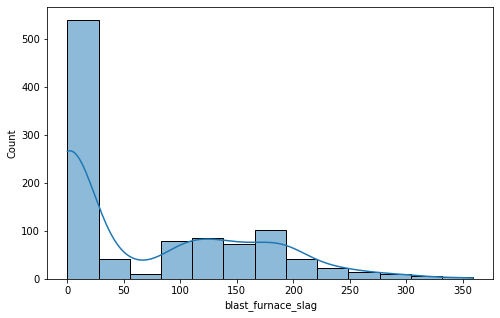

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(data.blast_furnace_slag, kde=True)
plt.show()

#### age

In [21]:
q1 = data.age.quantile(q=0.25)
q3 = data.age.quantile(q=0.75)
iqr = stats.iqr(data.age)
print('1st Quartile:', q1)
print('3rd Quartile:', q3)
print('Inter-Quartile Range:', iqr)

<IPython.core.display.Javascript object>

1st Quartile: 7.0
3rd Quartile: 56.0
Inter-Quartile Range: 49.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

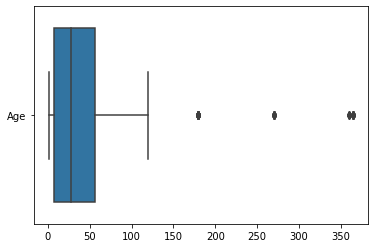

In [22]:
sns.boxplot(data.age, orient='h')
plt.yticks([0], ['Age'])
plt.show()

In [23]:
l_limit = q1-1.5*iqr
u_limit = q3+1.5*iqr
print(f'Range of values in water: [{l_limit}, {u_limit}]')

Range of values in water: [-66.5, 129.5]


In [24]:
print('Outliers below Lower Limit:', data[data.age<l_limit]['age'].count())
print('Ouliers above Upper Limit:', data[data.age>u_limit]['age'].count())

Outliers below Lower Limit: 0
Ouliers above Upper Limit: 59


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

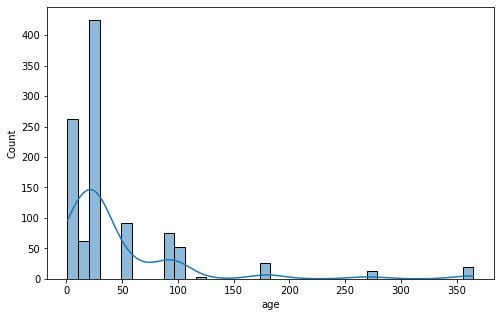

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(data.age, kde=True)
plt.show()

### Multi-variate analysis

In [26]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

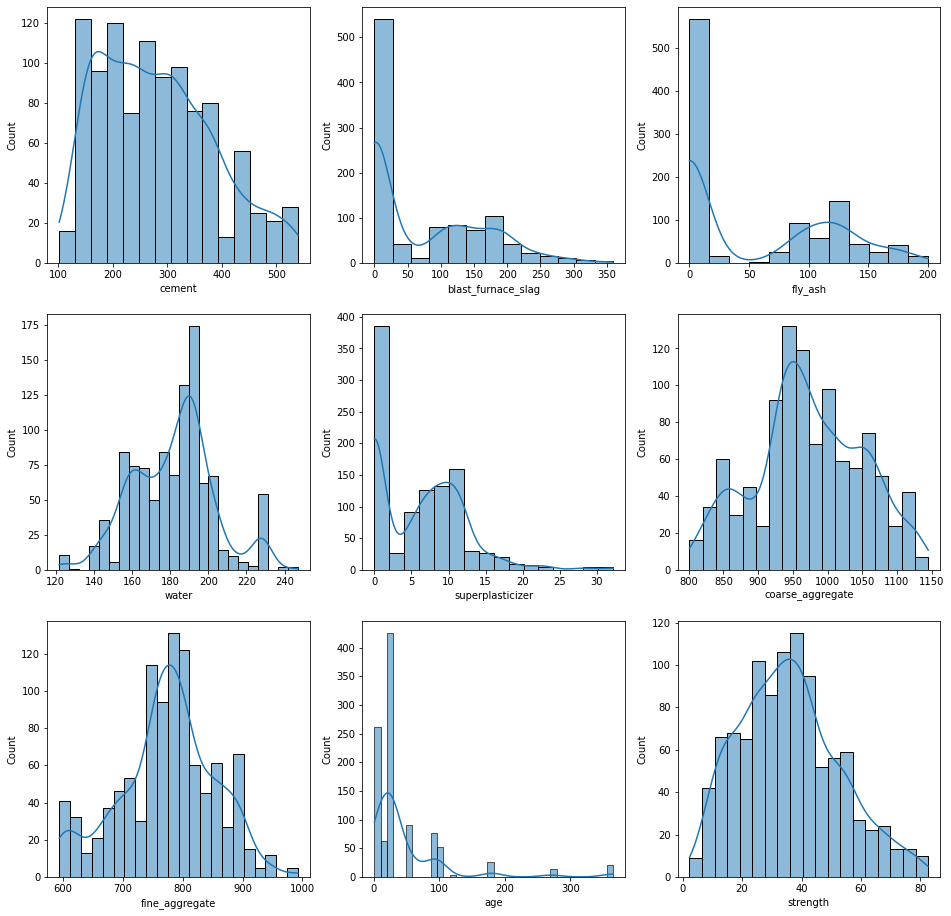

In [27]:
fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.histplot(data.cement,ax=ax2[0][0], kde=True)
sns.histplot(data.blast_furnace_slag,ax=ax2[0][1], kde=True)
sns.histplot(data.fly_ash,ax=ax2[0][2], kde=True)
sns.histplot(data.water,ax=ax2[1][0], kde=True)
sns.histplot(data.superplasticizer,ax=ax2[1][1], kde=True)
sns.histplot(data.coarse_aggregate,ax=ax2[1][2], kde=True)
sns.histplot(data.fine_aggregate,ax=ax2[2][0], kde=True)
sns.histplot(data.age,ax=ax2[2][1], kde=True)
sns.histplot(data.strength,ax=ax2[2][2], kde=True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

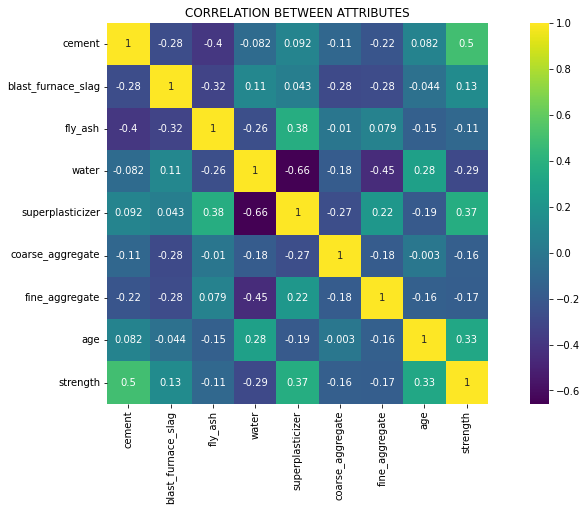

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('CORRELATION BETWEEN ATTRIBUTES')
plt.show()

In [29]:
# Replacing all outliers with Median

for col in data.columns[:-1]:
    q1 = data[col].quantile(q=0.25)
    q3 = data[col].quantile(q=0.75)
    iqr = stats.iqr(data[col])
    l_limit = q1-1.5*iqr
    u_limit = q3+1.5*iqr
    
    data.loc[(data[col]<l_limit) | (data[col]>u_limit), col] = data[col].median()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### FEATURE ENGINEERING & MODEL BUILDING

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.240680,85.384419,0.00,0.000,22.000,142.725,342.1
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.653107,20.603205,126.60,164.900,185.000,192.000,228.0
superplasticizer,1030.0,5.973592,5.477165,0.00,0.000,6.400,10.075,23.4
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,772.546019,78.703232,594.00,730.950,779.400,822.200,945.0
age,1030.0,32.256311,27.803705,1.00,7.000,28.000,28.000,120.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [31]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [32]:
X = data.drop(['strength'], axis=1)
y = data['strength']

In [33]:
X_scaled = X.apply(stats.zscore)

<IPython.core.display.Javascript object>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

<IPython.core.display.Javascript object>

#### Random Forest

In [35]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [36]:
rf_preds = rf.predict(X_test)

In [37]:
rf.score(X_test, y_test)

0.8766780405641321

In [38]:
rf_acc = metrics.r2_score(y_test, rf_preds)
print(f'R-sqaured Accuracy: {rf_acc}\nMean squared error: {metrics.mean_squared_error(y_test, rf_preds)}')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

R-sqaured Accuracy: 0.8766780405641321
Mean squared error: 33.40439124881412


In [39]:
# Storing Model's Accuracy

results = pd.DataFrame({'Algorithm': 'RandomForest', 'Accuracy': rf_acc}, index={1})
results

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678


#### KFold Cross-Validation

In [40]:
k = 20
kfold = KFold(n_splits=k, random_state=42, shuffle=True)
k_results = cross_val_score(rf, X, y, cv=kfold)
k_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.89712162, 0.90074241, 0.94266463, 0.89487883, 0.924914  ,
       0.83458921, 0.90590911, 0.94635013, 0.9085307 , 0.86365528,
       0.92941161, 0.96377437, 0.92720076, 0.93887986, 0.93897981,
       0.88847745, 0.88827001, 0.90855559, 0.89006846, 0.90642039])

In [41]:
k_acc = np.mean(abs(k_results))
k_acc

<IPython.core.display.Javascript object>

0.9099697112611557

In [42]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'RandomForest K-Fold', 'Accuracy': k_acc}, index={2})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970


#### Gradient Boosting Regressor

In [43]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [44]:
gb_preds = gb.predict(X_test)

In [45]:
gb_acc = metrics.r2_score(y_test, gb_preds)

<IPython.core.display.Javascript object>

In [46]:
gb_acc

0.8755742010664423

In [47]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'Gradient Boosting', 'Accuracy': gb_acc}, index={3})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574


#### Kfold Cross-Validation

In [48]:
k = 20
kfold = KFold(n_splits=k, random_state=42, shuffle=True)
k_results = cross_val_score(gb, X, y, cv=kfold)
k_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.91010172, 0.84696802, 0.91115317, 0.88896482, 0.90483148,
       0.87212491, 0.87809795, 0.91393273, 0.88422673, 0.85806489,
       0.93335342, 0.96592485, 0.89493846, 0.92637235, 0.9028505 ,
       0.87765724, 0.89884382, 0.90793414, 0.8979304 , 0.88870287])

In [49]:
k_acc = np.mean(abs(k_results))
k_acc

<IPython.core.display.Javascript object>

0.8981487239939338

In [50]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'Gradient Boosting K-Fold', 'Accuracy': k_acc}, index={4})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149


#### Ada Boosting Regressor

In [51]:
from sklearn.ensemble import AdaBoostRegressor

In [52]:
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

AdaBoostRegressor()

In [53]:
ab_preds = ab.predict(X_test)
ab_acc = metrics.r2_score(y_test, ab_preds)
ab_acc

<IPython.core.display.Javascript object>

0.7750142686636503

In [54]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'AdaBoosting', 'Accuracy': ab_acc}, index={5})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014


#### Kfold Cross-validation

In [55]:
k = 20
kfold = KFold(n_splits=k, random_state=42, shuffle=True)
k_results = cross_val_score(ab, X, y, cv=kfold)
k_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.79884963, 0.71798463, 0.76103409, 0.7744621 , 0.76400695,
       0.76335609, 0.75836639, 0.82788985, 0.75962993, 0.76154003,
       0.80298264, 0.86255964, 0.76995478, 0.81713577, 0.79250339,
       0.72391495, 0.69364934, 0.79951062, 0.74209702, 0.8022977 ])

In [56]:
k_acc = np.mean(abs(k_results))
k_acc

<IPython.core.display.Javascript object>

0.7746862772937148

In [57]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'AdaBoosting K-Fold', 'Accuracy': k_acc}, index={6})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686


#### KNN Regressor

In [58]:
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor

diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

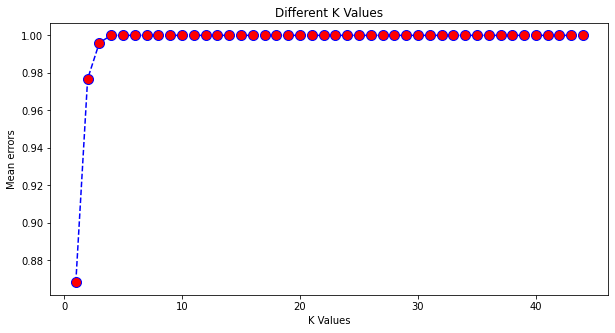

In [59]:
plt.figure(figsize=(10,5))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')
plt.show()

In [60]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [61]:
knn_preds = knn.predict(X_test)
knn_acc = metrics.r2_score(y_test, knn_preds)
knn_acc

<IPython.core.display.Javascript object>

0.7733994912107738

In [62]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'KNN Regressor', 'Accuracy': knn_acc}, index={7})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399


#### Kfold Cross-validation

In [63]:
k = 20
kfold = KFold(n_splits=k, random_state=42, shuffle=True)
k_results = cross_val_score(knn, X, y, cv=kfold)
k_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.6777964 , 0.73846777, 0.82403659, 0.66542529, 0.72397696,
       0.29797538, 0.84582451, 0.78172513, 0.61737191, 0.44920613,
       0.75705668, 0.81575956, 0.79158204, 0.78660577, 0.7645263 ,
       0.73014544, 0.63907248, 0.70557317, 0.74931773, 0.64515758])

In [64]:
k_acc = np.mean(abs(k_results))
k_acc

<IPython.core.display.Javascript object>

0.7003301406142932

In [65]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'KNN Regressor K-Fold', 'Accuracy': k_acc}, index={8})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330


#### Bagging Regressor

In [66]:
from sklearn.ensemble import BaggingRegressor

In [67]:
br = BaggingRegressor()
br.fit(X_train, y_train)

BaggingRegressor()

In [68]:
br_preds = br.predict(X_test)
br_acc = metrics.r2_score(y_test, br_preds)
br_acc

<IPython.core.display.Javascript object>

0.868594595854475

In [69]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'Bagging Regressor', 'Accuracy': br_acc}, index={9})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330
9,Bagging Regressor,0.868595


#### Kfold Cross-validation

In [70]:
k = 20
kfold = KFold(n_splits=k, random_state=42, shuffle=True)
k_results = cross_val_score(br, X, y, cv=kfold)
k_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.87686292, 0.89164905, 0.93292147, 0.87846428, 0.91679085,
       0.85591508, 0.90003756, 0.92956192, 0.90869332, 0.85732568,
       0.92007261, 0.9566948 , 0.92539279, 0.93516945, 0.94151928,
       0.87319747, 0.88283666, 0.90876034, 0.88473484, 0.88402625])

In [71]:
k_acc = np.mean(abs(k_results))
k_acc

<IPython.core.display.Javascript object>

0.9030313306547365

In [72]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'Bagging Regressor K-Fold', 'Accuracy': k_acc}, index={10})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330
9,Bagging Regressor,0.868595
10,Bagging Regressor K-Fold,0.903031


#### Support Vector Regressor

In [73]:
svr = svm.SVR(kernel='linear')
svr.fit(X_train, y_train)

<IPython.core.display.Javascript object>

SVR(kernel='linear')

In [74]:
svr_preds = svr.predict(X_test)
svr_acc = metrics.r2_score(y_test, svr_preds)
svr_acc

<IPython.core.display.Javascript object>

0.686947097079784

In [75]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'Support Vector Regressor', 'Accuracy': svr_acc}, index={11})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330
9,Bagging Regressor,0.868595
10,Bagging Regressor K-Fold,0.903031


#### Kfold Cross-validation

In [76]:
k = 20
kfold = KFold(n_splits=k, random_state=42, shuffle=True)
k_results = cross_val_score(svr, X, y, cv=kfold)
k_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.76309685, 0.62599853, 0.76489997, 0.56416363, 0.70533664,
       0.63073659, 0.71312432, 0.76577528, 0.577072  , 0.6552034 ,
       0.73069143, 0.84646917, 0.70280501, 0.8137757 , 0.73112169,
       0.81150609, 0.6277547 , 0.59066881, 0.62298161, 0.66314948])

In [77]:
k_acc = np.mean(abs(k_results))
k_acc

<IPython.core.display.Javascript object>

0.6953165458303199

In [78]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'Support Vector Regressor k-Fold', 'Accuracy': k_acc}, index={12})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330
9,Bagging Regressor,0.868595
10,Bagging Regressor K-Fold,0.903031


#### XGBoost Regressor

In [79]:
from xgboost.sklearn import XGBRegressor

In [80]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
xgr_preds = xgr.predict(X_test)
xgr_acc = metrics.r2_score(y_test, xgr_preds)
xgr_acc

<IPython.core.display.Javascript object>

0.8950241747323542

In [82]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'XGBoost Regressor', 'Accuracy': xgr_acc}, index={13})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330
9,Bagging Regressor,0.868595
10,Bagging Regressor K-Fold,0.903031


#### Kfold Cross-validation

In [83]:
k = 20
kfold = KFold(n_splits=k, random_state=42, shuffle=True)
k_results = cross_val_score(xgr, X, y, cv=kfold)
k_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.95230521, 0.93078579, 0.95120247, 0.91746651, 0.90844648,
       0.87938421, 0.93289973, 0.93849546, 0.90257449, 0.86315551,
       0.94151919, 0.96349384, 0.93729775, 0.95044844, 0.93960076,
       0.92142525, 0.93398574, 0.92726792, 0.89070561, 0.91590625])

In [84]:
k_acc = np.mean(abs(k_results))
k_acc

<IPython.core.display.Javascript object>

0.9249183299621471

In [85]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'XGBoost Regressor K-Fold', 'Accuracy': k_acc}, index={14})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330
9,Bagging Regressor,0.868595
10,Bagging Regressor K-Fold,0.903031


#### DecisionTree Regressor

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [88]:
print('Feature importance: \n',pd.DataFrame(dt.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
                     Importance
cement                0.354542
blast_furnace_slag    0.070112
fly_ash               0.027918
water                 0.141597
superplasticizer      0.025212
coarse_aggregate      0.019738
fine_aggregate        0.047652
age                   0.313227


In [89]:
dt_preds = dt.predict(X_test)
dt_acc = metrics.r2_score(y_test, dt_preds)
dt_acc

<IPython.core.display.Javascript object>

0.7722781995791478

In [90]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'DecisionTree Regressor', 'Accuracy': dt_acc}, index={15})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330
9,Bagging Regressor,0.868595
10,Bagging Regressor K-Fold,0.903031


#### Kfold Cross-validation

In [91]:
k = 20
kfold = KFold(n_splits=k, random_state=42, shuffle=True)
k_results = cross_val_score(dt, X, y, cv=kfold)
k_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.84234461, 0.87077821, 0.90348836, 0.89143615, 0.89155806,
       0.7185528 , 0.90537164, 0.90860924, 0.86585142, 0.76686487,
       0.852123  , 0.93521895, 0.90455074, 0.92606287, 0.87621524,
       0.88724246, 0.78270529, 0.87009357, 0.82484545, 0.89344335])

In [92]:
k_acc = np.mean(abs(k_results))
k_acc

<IPython.core.display.Javascript object>

0.8658678139715829

In [93]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'DecisionTree Regressor K-Fold', 'Accuracy': k_acc}, index={16})])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,RandomForest,0.876678
2,RandomForest K-Fold,0.909970
3,Gradient Boosting,0.875574
4,Gradient Boosting K-Fold,0.898149
5,AdaBoosting,0.775014
6,AdaBoosting K-Fold,0.774686
7,KNN Regressor,0.773399
8,KNN Regressor K-Fold,0.700330
9,Bagging Regressor,0.868595
10,Bagging Regressor K-Fold,0.903031


#### Visualizing DecisionTree

In [101]:
dt_2 = DecisionTreeRegressor(max_depth=4)
dt_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [95]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [98]:
X_scaled_df = X_scaled.copy()
feature_cols = X_scaled_df.columns

In [115]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

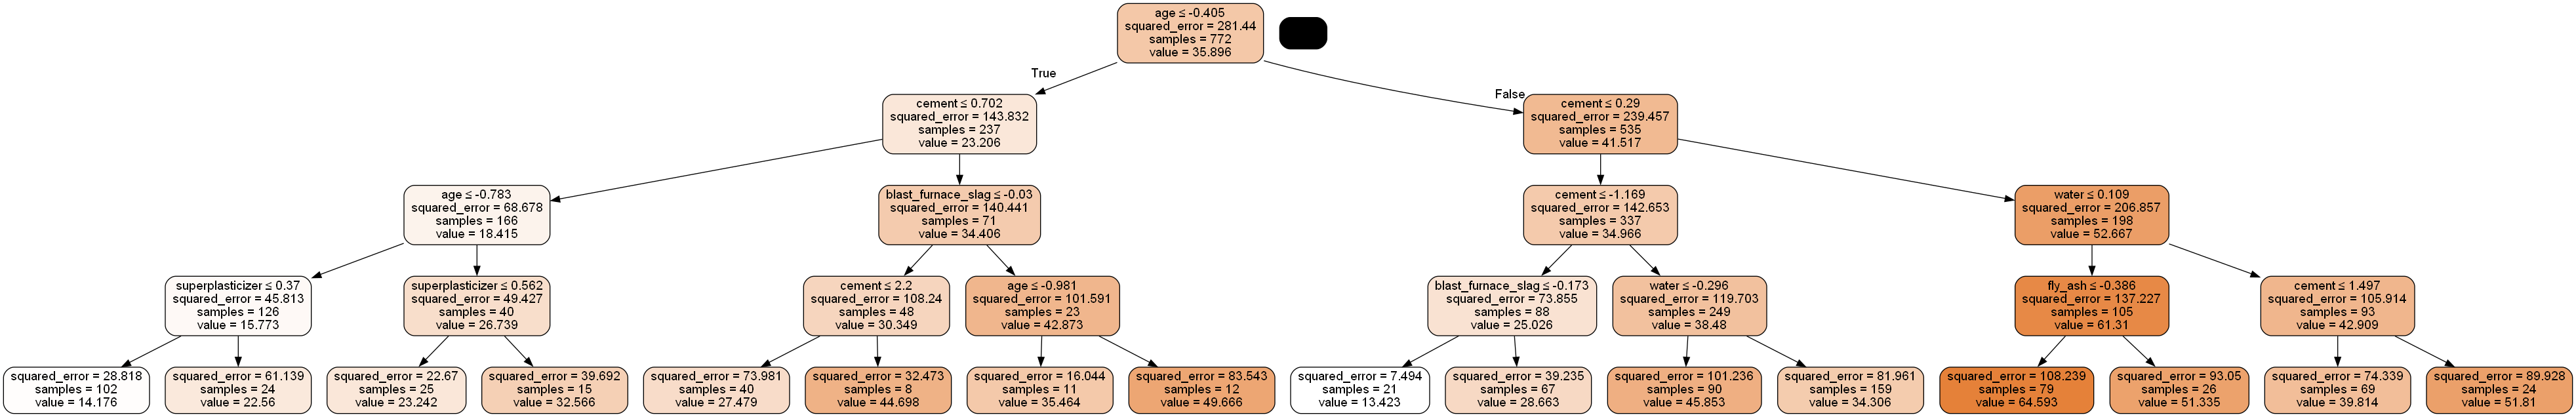

In [120]:
dot_data = StringIO()
export_graphviz(dt_2,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_pruned.png')
Image(graph.create_png())